# ENV717 L11 - UNIT COMMITMENT PROBLEM

#### Data from Handout Lesson 8 - 9 - 10
##### Constraints Included:  Pmin, Pmax, Demand Balance constraints
#### Costs included: Fixed and variable
##### Work on your own to include ramping constraints

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyomo.environ import *
opt = SolverFactory('cplex')

In [11]:
#Read or initialize data
#SETS AND INDEXES
NumGen=2
N=np.array([n for n in range(0,NumGen)]) #This array has 2 components, but the index starts at zero

In [12]:
T=24
T=np.array([t for t in range(0,T)])

In [13]:
#GENERATORS' PARAMETERS
FixCost=np.array([1 for n in N])
SDCost=np.array([1 for n in N])
SUCost=np.array([1 for n in N])
VarCost=np.array([1 for n in N])
PMax=np.array([1 for n in N])
PMin=np.array([1 for n in N])
Demand=np.array([1 for n in T])

In [14]:
#DATA FOR PARAMETERS - better to read from a csv file
FixCost=[5,6]
SDCost=[370,400]
SUCost=[10700,11000]
VarCost=[25,26]
PMax=[300,600]
PMin=[30,60]
Demand=[200,230,270,280,260,270,290,330,350,370,400,410,420,420,380,360,340,300,300,310,290,280,260,250]

In [15]:
#UC MODEL
def Unit_Commitment():
    m=ConcreteModel()
    m.N=Set(initialize=N)
    m.T=Set(initialize=T)
    m.x=Var(m.N, m.T, bounds = (0,350))
    m.u=Var(m.N, m.T, domain=Binary)
    m.system_cost=Objective(expr=sum(m.x[n,t]*VarCost[n]+m.u[n,t]*FixCost[n] for n in m.N for t in m.T), sense=minimize)
    m.DemandConstraint=Constraint(m.T, rule=lambda m, t: sum(m.x[n,t] for n in N) == Demand[t])
    m.MinPower=Constraint(m.N, m.T, rule=lambda m, n, t: PMin[n]*m.u[n,t] <= m.x[n,t])
    m.MaxPower=Constraint(m.N, m.T, rule=lambda m, n, t: PMax[n]*m.u[n,t] >= m.x[n,t])
    return m

In [16]:
m=Unit_Commitment()
SolverFactory('cplex').solve(m).write() # Instead of this line, write "opt.solve(m)" if model's details are not important

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmppo0n19a1
  Lower bound: 190336.0
  Upper bound: 190336.0
  Number of objectives: 1
  Number of constraints: 121
  Number of variables: 97
  Number of nonzeros: 241
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.05
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = 1.9033600000e+05
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.09483981132507324
# ---

In [23]:
print('SOLUTION')
print('The total system cost is = $',m.system_cost())
print('Commitment and Generation')
for n in N:
    for t in T:
        print("n = {0:2d}  t = {1:2d}   {2} {3:.1f}  {4:.2f}".format(n, t, m.u[n,t], m.u[n,t](), m.x[n,t]()))
        #Line above makes columns the same width and formats the numbers of decimals for u and x. Line below has a messy format
        #print(m.x[n,t]," = ", m.x[n,t](), "MWh", m.u[n,t], " =", m.u[n,t]()) #this works too but format is messy

SOLUTION
The total system cost is = $ 190336.0
Commitment and Generation
n =  0  t =  0   u[0,0] 1.0  200.00
n =  0  t =  1   u[0,1] 1.0  230.00
n =  0  t =  2   u[0,2] 1.0  270.00
n =  0  t =  3   u[0,3] 1.0  280.00
n =  0  t =  4   u[0,4] 1.0  260.00
n =  0  t =  5   u[0,5] 1.0  270.00
n =  0  t =  6   u[0,6] 1.0  290.00
n =  0  t =  7   u[0,7] 1.0  270.00
n =  0  t =  8   u[0,8] 1.0  290.00
n =  0  t =  9   u[0,9] 1.0  300.00
n =  0  t = 10   u[0,10] 1.0  300.00
n =  0  t = 11   u[0,11] 1.0  300.00
n =  0  t = 12   u[0,12] 1.0  300.00
n =  0  t = 13   u[0,13] 1.0  300.00
n =  0  t = 14   u[0,14] 1.0  300.00
n =  0  t = 15   u[0,15] 1.0  300.00
n =  0  t = 16   u[0,16] 1.0  280.00
n =  0  t = 17   u[0,17] 1.0  300.00
n =  0  t = 18   u[0,18] 1.0  300.00
n =  0  t = 19   u[0,19] 1.0  250.00
n =  0  t = 20   u[0,20] 1.0  290.00
n =  0  t = 21   u[0,21] 1.0  280.00
n =  0  t = 22   u[0,22] 1.0  260.00
n =  0  t = 23   u[0,23] 1.0  250.00
n =  1  t =  0   u[1,0] 0.0  -0.00
n =  1  t =  1

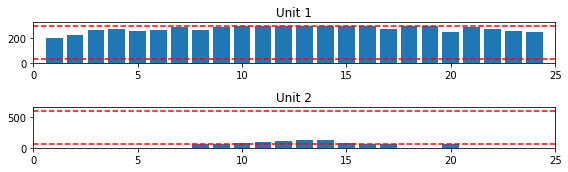

In [24]:
#Graph solution

fig, ax = plt.subplots(max(N)+1, 1, figsize=(8, 1.5*max(N)+1))
for n in N:
    ax[n].bar(T+1, [m.x[n,t]() for t in T])
    ax[n].set_xlim(0, max(T)+2)
    ax[n].set_ylim(0, 1.1*PMax[n])
    ax[n].plot(ax[n].get_xlim(), np.array([PMax[n], PMax[n]]), 'r--')
    ax[n].plot(ax[n].get_xlim(), np.array([PMin[n], PMin[n]]), 'r--')
    ax[n].set_title('Unit ' + str(n+1))
fig.tight_layout()